# Context

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

titanic_data = pd.read_csv('train.csv', index_col = 'PassengerId')
f'Total passengers count: {len(titanic_data)}'

'Total passengers count: 100000'

We would use a function, which calculate percentage of column based on another column

In [2]:
def percentage_column(df: pd.DataFrame, sumColumn, calculateColumn):
    return df.groupby(sumColumn)[calculateColumn].apply(lambda x: 100 * x / float(x.sum()))

# Data quality assessment

'Survived invalid values 0.0 %'

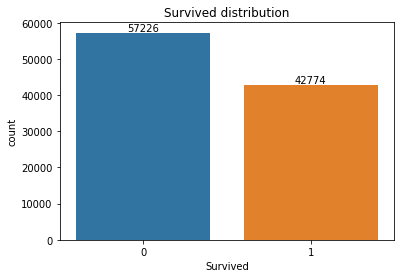

In [3]:
survived_plot = sns.countplot(data = titanic_data, x = 'Survived')
survived_plot.bar_label(survived_plot.containers[0])
plt.title('Survived distribution')

invalid_survived = titanic_data[(titanic_data["Survived"] != 0) & (titanic_data["Survived"] != 1)]
f'Survived invalid values {len(invalid_survived) / len(titanic_data) * 100} %'

'PClass invalid values 0.0 %'

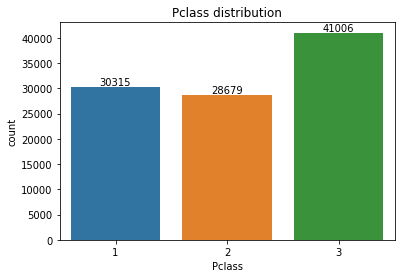

In [4]:
pclass_plot = sns.countplot(data = titanic_data, x = 'Pclass')
pclass_plot.bar_label(pclass_plot.containers[0])
plt.title('Pclass distribution')

invalid_pclass = titanic_data[~titanic_data["Pclass"].isin([1, 2, 3])]
f'PClass invalid values {len(invalid_pclass) / len(titanic_data) * 100} %'

'Sex invalid values 0.0 %'

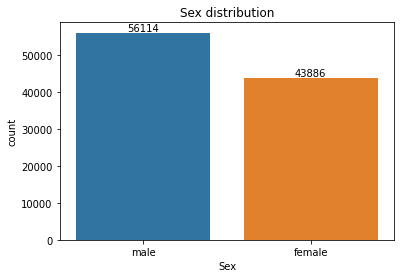

In [5]:
sex_plot = sns.countplot(data = titanic_data, x = 'Sex')
sex_plot.bar_label(sex_plot.containers[0])
plt.title('Sex distribution')

invalid_sex = titanic_data[~titanic_data["Sex"].isin(['male', 'female'])]
f'Sex invalid values {len(invalid_sex) / len(titanic_data) * 100} %'

count    96708.000000
mean        38.355472
std         18.313556
min          0.080000
25%         25.000000
50%         39.000000
75%         53.000000
max         87.000000
Name: Age, dtype: float64


'Age invalid values 3.292 %'

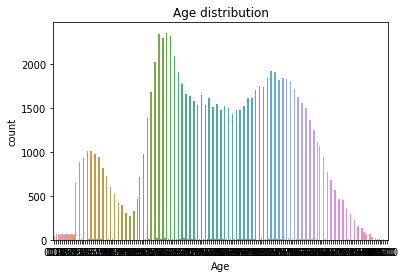

In [6]:
age_plot = sns.countplot(data = titanic_data, x = 'Age')
plt.title('Age distribution')
print(titanic_data['Age'].describe())

invalid_age = titanic_data[titanic_data["Age"].isna()]
f'Age invalid values {len(invalid_age) / len(titanic_data) * 100} %'

'Siblings/spouses aboard invalid values 0.0 %'

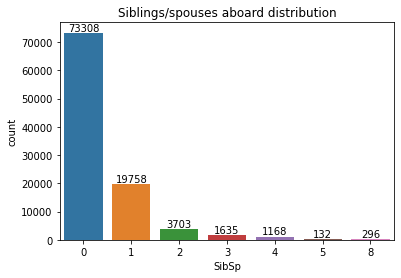

In [7]:
sib_sp_plot = sns.countplot(data = titanic_data, x = 'SibSp')
sib_sp_plot.bar_label(sib_sp_plot.containers[0])
plt.title('Siblings/spouses aboard distribution')

invalid_sibsp = titanic_data[(titanic_data["SibSp"].isna()) & (titanic_data['SibSp'] >= 0)]
f'Siblings/spouses aboard invalid values {len(invalid_sibsp) / len(titanic_data) * 100} %'

'Parents/children aboard invalid values 0.0 %'

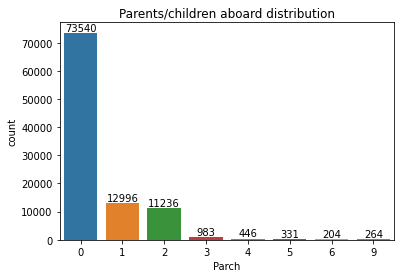

In [8]:
parch_plot = sns.countplot(data = titanic_data, x = 'Parch')
parch_plot.bar_label(parch_plot.containers[0])
plt.title('Parents/children aboard distribution')

invalid_parch = titanic_data[(titanic_data["Parch"].isna()) & (titanic_data['Parch'] >= 0)]
f'Parents/children aboard invalid values {len(invalid_parch) / len(titanic_data) * 100} %'

In [9]:
invalid_ticket = titanic_data[titanic_data["Ticket"].isnull()]
print(f'Ticket invalid values {len(invalid_ticket) / len(titanic_data) * 100} %')

Ticket invalid values 4.623 %


count    99866.00000
mean        43.92933
std         69.58882
min          0.68000
25%         10.04000
50%         24.46000
75%         33.50000
max        744.66000
Name: Fare, dtype: float64


'Fare invalid values 0.134 %'

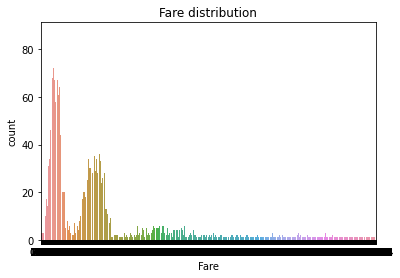

In [10]:
fare_plot = sns.countplot(data = titanic_data, x = 'Fare')
plt.title('Fare distribution')
print(titanic_data['Fare'].describe())

invalid_fare = titanic_data[titanic_data["Fare"].isna()]
f'Fare invalid values {len(invalid_fare) / len(titanic_data) * 100} %'

In [11]:
invalid_cabin = titanic_data[titanic_data["Cabin"].isnull()]
f'Cabin invalid values {len(invalid_cabin) / len(titanic_data) * 100} %'

'Cabin invalid values 67.866 %'

'Embarked invalid values 0.25 %'

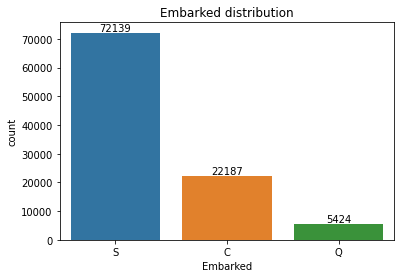

In [12]:
embarked_plot = sns.countplot(data = titanic_data, x = 'Embarked')
embarked_plot.bar_label(embarked_plot.containers[0])
plt.title('Embarked distribution')

invalid_embarked = titanic_data[~titanic_data["Embarked"].isin(['C', 'Q', 'S'])]
f'Embarked invalid values {len(invalid_embarked) / len(titanic_data) * 100} %'

# Data exploration

## Women and children first

Let's verify if phrase `Women and children first` verified in our dataset:

First, let's verify survived percentage according to different gender:

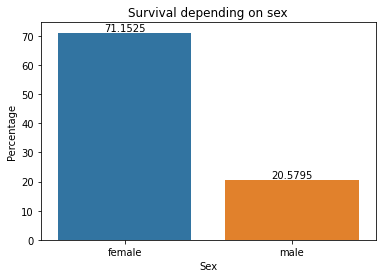

In [15]:
survived_sex_data = titanic_data.groupby(['Sex', 'Survived']).size().rename('Count').reset_index()

survived_sex_data['Percentage'] = percentage_column(survived_sex_data, 'Sex', 'Count')
survived_sex_data = survived_sex_data[survived_sex_data['Survived'] == 1]

survived_age_plot = sns.barplot(x = survived_sex_data['Sex'], y = survived_sex_data['Percentage'])
survived_age_plot.bar_label(survived_age_plot.containers[0])
plt.title('Survival depending on sex')
plt.show()

As we can see much more women was saved comparing with men (71% to 21%)

Let's examine dependency beween age and surviving

   Age  Survived  Count  Percentage
1    0         1   1191          38
3    3         1   1204          40
5    6         1   1083          43
7    9         1    852          55
9   12         1    598          61
11  15         1    520          34
13  18         1   1137          28
15  21         1   2068          30
17  24         1   2385          35
19  27         1   2121          39
21  30         1   1770          37
23  33         1   1731          36
25  36         1   1819          39
27  39         1   2044          45
29  42         1   2146          47
31  45         1   2437          49
33  48         1   2476          46
35  51         1   2678          47
37  54         1   2577          46
39  57         1   2318          47
41  60         1   2052          49
43  63         1   1590          50
45  66         1   1101          54
47  69         1    776          60
49  72         1    429          62
51  75         1    197          67
53  78         1     94     

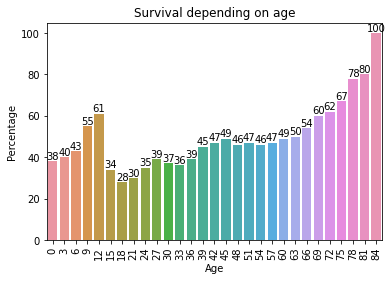

In [16]:
age_group = 3
survived_age_data = titanic_data.groupby(
    [pd.cut(titanic_data['Age'], np.arange(90 / age_group) * age_group), 'Survived']).size().rename(
    'Count').reset_index()

survived_age_data['Percentage'] = percentage_column(survived_age_data, 'Age', 'Count')
survived_age_data = survived_age_data[(survived_age_data['Survived'] == 1) & (survived_age_data['Percentage'].notna())]
survived_age_data['Age'] = survived_age_data['Age'].apply(lambda col: pd.Categorical(col).codes * age_group)
survived_age_data['Percentage'] = survived_age_data['Percentage'].apply(lambda x: int(x))
print(survived_age_data)

survived_age_plot = sns.barplot(x = survived_age_data['Age'], y = survived_age_data['Percentage'])
survived_age_plot.bar_label(survived_age_plot.containers[0])
plt.title('Survival depending on age')
plt.xticks(rotation=90)
plt.show()

Here we can see that in general children had more chances to survive than adult, but category of old people survived was the most survivable. It might be explained, that old people as the most helpless category was tried to save at first, category 18-21 age was tried to save at last

Let's verify this tendency according only male survivors

   Age  Survived  Count  Percentage
1    0         1    361          22
3    3         1    299          20
5    6         1    221          20
7    9         1     72          16
9   12         1     58          21
11  15         1    204          19
13  18         1    482          16
15  21         1    738          15
17  24         1    732          16
19  27         1    578          18
21  30         1    575          18
23  33         1    587          18
25  36         1    560          19
27  39         1    618          24
29  42         1    628          25
31  45         1    748          27
33  48         1    743          24
35  51         1    742          24
37  54         1    673          23
39  57         1    545          21
41  60         1    441          22
43  63         1    272          20
45  66         1    145          20
47  69         1     89          25
49  72         1     32          20
51  75         1     12          24
53  78         1      1     

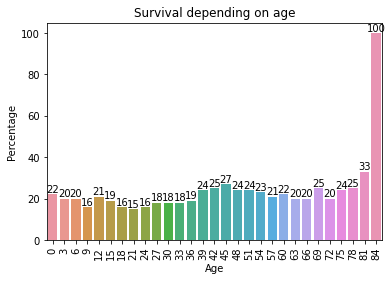

In [17]:
titanic_male_data = titanic_data[titanic_data['Sex'] == 'male']

age_group = 3
male_survived_age_data = titanic_male_data.groupby(
    [pd.cut(titanic_male_data['Age'], np.arange(90 / age_group) * age_group), 'Survived']).size().rename(
    'Count').reset_index()

male_survived_age_data['Percentage'] = percentage_column(male_survived_age_data, 'Age', 'Count')
male_survived_age_data = male_survived_age_data[(male_survived_age_data['Survived'] == 1) & (male_survived_age_data['Percentage'].notna())]
male_survived_age_data['Age'] = male_survived_age_data['Age'].apply(lambda col: pd.Categorical(col).codes * age_group)
male_survived_age_data['Percentage'] = male_survived_age_data['Percentage'].apply(lambda x: int(x))
print(male_survived_age_data)

male_survived_age_plot = sns.barplot(x = male_survived_age_data['Age'], y = male_survived_age_data['Percentage'])
male_survived_age_plot.bar_label(male_survived_age_plot.containers[0])
plt.title('Survival depending on age')
plt.xticks(rotation = 90)
plt.show()

It means that for men tendency of increasing percentagy for elder people not working. Let's do the following for women

   Age  Survived  Count  Percentage
1    0         1    830          54
3    3         1    905          58
5    6         1    862          60
7    9         1    780          69
9   12         1    540          77
11  15         1    316          70
13  18         1    655          62
15  21         1   1330          64
17  24         1   1653          67
19  27         1   1543          71
21  30         1   1195          74
23  33         1   1144          71
25  36         1   1259          73
27  39         1   1426          74
29  42         1   1518          75
31  45         1   1689          77
33  48         1   1733          74
35  51         1   1936          74
37  54         1   1904          73
39  57         1   1773          74
41  60         1   1611          72
43  63         1   1318          73
45  66         1    956          73
47  69         1    687          74
49  72         1    397          75
51  75         1    185          75
53  78         1     93     

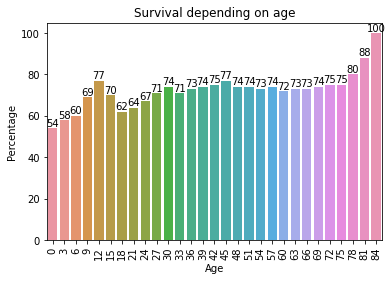

In [18]:
titanic_female_data = titanic_data[titanic_data['Sex'] == 'female']

age_group = 3
female_survived_age_data = titanic_female_data.groupby(
    [pd.cut(titanic_female_data['Age'], np.arange(90 / age_group) * age_group), 'Survived']).size().rename(
    'Count').reset_index()

female_survived_age_data['Percentage'] = percentage_column(female_survived_age_data, 'Age', 'Count')
female_survived_age_data = female_survived_age_data[(female_survived_age_data['Survived'] == 1) & (female_survived_age_data['Percentage'].notna())]
female_survived_age_data['Age'] = female_survived_age_data['Age'].apply(lambda col: pd.Categorical(col).codes * age_group)
female_survived_age_data['Percentage'] = female_survived_age_data['Percentage'].apply(lambda x: int(x))
print(female_survived_age_data)

female_survived_age_plot = sns.barplot(x = female_survived_age_data['Age'], y = female_survived_age_data['Percentage'])
female_survived_age_plot.bar_label(female_survived_age_plot.containers[0])
plt.title('Survival depending on age')
plt.xticks(rotation = 90)
plt.show()

There is no high dependency too. Let's verify number of women and men on the titanic depending on age

   Age   Sex  Count  Percentage
1    0  male   1584          51
3    3  male   1445          48
5    6  male   1082          43
7    9  male    431          27
9   12  male    267          27
11  15  male   1059          70
13  18  male   3006          74
15  21  male   4636          69
17  24  male   4364          64
19  27  male   3211          59
21  30  male   3148          66
23  33  male   3209          66
25  36  male   2845          62
27  39  male   2540          56
29  42  male   2499          55
31  45  male   2767          55
33  48  male   3024          56
35  51  male   3091          54
37  54  male   2918          53
39  57  male   2541          51
41  60  male   1924          46
43  63  male   1325          42
45  66  male    722          35
47  69  male    356          27
49  72  male    155          22
51  75  male     50          17
53  78  male      4           3
55  81  male      3          14
57  84  male      1          14


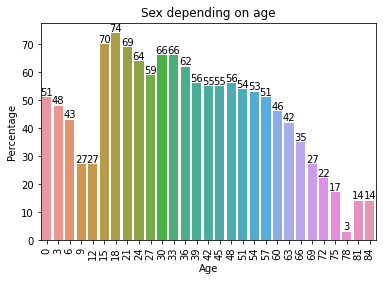

In [19]:
age_group = 3
sex_age_data = titanic_data.groupby(
    [pd.cut(titanic_data['Age'], np.arange(90 / age_group) * age_group), 'Sex']).size().rename(
    'Count').reset_index()

sex_age_data['Percentage'] = percentage_column(sex_age_data, 'Age', 'Count')
sex_age_data = sex_age_data[
    (sex_age_data['Sex'] == 'male') & (sex_age_data['Percentage'].notna())]
sex_age_data['Age'] = sex_age_data['Age'].apply(
    lambda col: pd.Categorical(col).codes * age_group)
sex_age_data['Percentage'] = sex_age_data['Percentage'].apply(lambda x: int(x))
print(sex_age_data)

sex_age_plot = sns.barplot(x = sex_age_data['Age'], y = sex_age_data['Percentage'])
sex_age_plot.bar_label(sex_age_plot.containers[0])
plt.title('Sex depending on age')
plt.xticks(rotation = 90)
plt.show()

So we can see that there is a correlation between age and sex at the ship. There are much more young man than young women, but there are much more old women than young man. It explains increasing surviving among old people, as we remember women survived much more often than men

## PClass assesment

Let's examine relationship between survived passengers and his ticket class. Here is the bar plot containing percentage of survived passensgers for different ticket classes

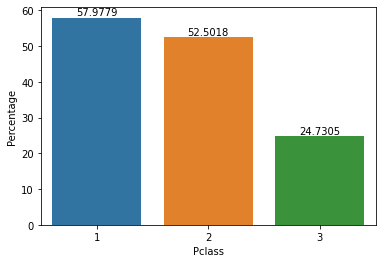

In [14]:
survived_pclass_data = titanic_data.groupby(['Pclass', 'Survived']).size().rename('Count').reset_index()
survived_pclass_data['Percentage'] = percentage_column(survived_pclass_data, 'Pclass', 'Count')
survived_pclass_data = survived_pclass_data[survived_pclass_data['Survived'] == 1]

survived_pclass_plot = sns.barplot(x = survived_pclass_data['Pclass'], y = survived_pclass_data['Percentage'])
survived_pclass_plot.bar_label(survived_pclass_plot.containers[0])
plt.show()

As we can see the higher passenger class leads to higher percentage of survived passengers. Let verify it by gender

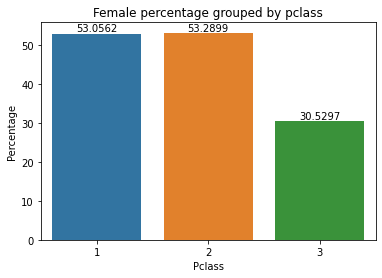

In [29]:
sex_pclass_data = titanic_data.groupby(['Pclass', 'Sex']).size().rename('Count').reset_index()

sex_pclass_data['Percentage'] = percentage_column(sex_pclass_data, 'Pclass', 'Count')
sex_pclass_data = sex_pclass_data[sex_pclass_data['Sex'] == 'female']

sex_pclass_plot = sns.barplot(x = sex_pclass_data['Pclass'], y = sex_pclass_data['Percentage'])
sex_pclass_plot.bar_label(sex_pclass_plot.containers[0])
plt.title('Female percentage grouped by pclass')
plt.show()

We see that women prefer higher class than men, it can explain their survival. Let's verify women/male survival by class

    Pclass  Survived     Sex  Count  Percentage
2        1         1  female  12357   40.761999
3        1         1    male   5219   17.215900
6        2         1  female  11753   40.981206
7        2         1    male   3304   11.520625
10       3         1  female   7116   17.353558
11       3         1    male   3025    7.376969


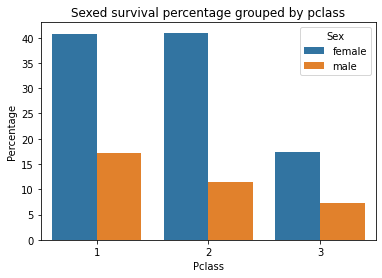

In [31]:
survived_pclass_data = titanic_data.groupby(['Pclass', 'Survived', 'Sex']).size().rename('Count').reset_index()
survived_pclass_data['Percentage'] = percentage_column(survived_pclass_data, 'Pclass', 'Count')
survived_pclass_data = survived_pclass_data[survived_pclass_data['Survived'] == 1]
print(survived_pclass_data)

survived_pclass_plot = sns.barplot(x = survived_pclass_data['Pclass'], y = survived_pclass_data['Percentage'],
                                   hue = survived_pclass_data['Sex'])
plt.title('Sexed survival percentage grouped by pclass')
plt.show()

We can see that for both men and women lower class leads to lower survival

## Siblings / spouses aboard research

Let's verify survivors grouped by siblings/spouses 

    SibSp  Survived  Count  Percentage
1       0         1  31291   42.684291
3       1         1   8570   43.374836
5       2         1   1681   45.395625
7       3         1    654   40.000000
9       4         1    439   37.585616
11      5         1     25   18.939394
13      8         1    114   38.513514


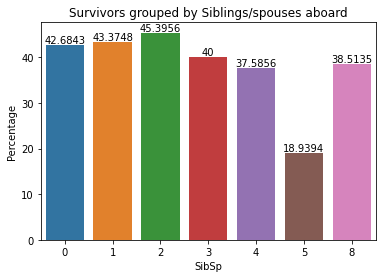

In [20]:
survived_sibsp_data = titanic_data.groupby(['SibSp', 'Survived']).size().rename('Count').reset_index()

survived_sibsp_data['Percentage'] = percentage_column(survived_sibsp_data, 'SibSp', 'Count')
survived_sibsp_data = survived_sibsp_data[survived_sibsp_data['Survived'] == 1]
print(survived_sibsp_data)

survived_sibsp_plot = sns.barplot(x = survived_sibsp_data['SibSp'], y = survived_sibsp_data['Percentage'])
survived_sibsp_plot.bar_label(survived_sibsp_plot.containers[0])
plt.title('Survivors grouped by Siblings/spouses aboard')
plt.show()

We can see much lower surviving results for families with 5 silings aboard. Could it be explained by sex?

    SibSp     Sex  Count  Percentage
0       0  female  31182   42.535603
2       1  female   9427   47.712319
4       2  female   1758   47.475020
6       3  female    817   49.969419
8       4  female    536   45.890411
10      5  female     34   25.757576
12      8  female    132   44.594595


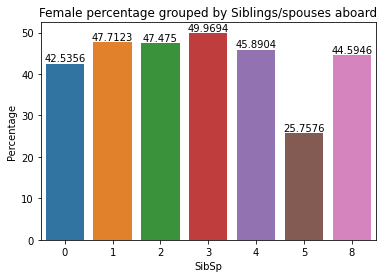

In [21]:
survived_sibsp_data = titanic_data.groupby(['SibSp', 'Sex']).size().rename('Count').reset_index()

survived_sibsp_data['Percentage'] = percentage_column(survived_sibsp_data, 'SibSp', 'Count')
survived_sibsp_data = survived_sibsp_data[survived_sibsp_data['Sex'] == 'female']
print(survived_sibsp_data)

survived_age_plot = sns.barplot(x = survived_sibsp_data['SibSp'], y = survived_sibsp_data['Percentage'])
survived_age_plot.bar_label(survived_age_plot.containers[0])
plt.title('Female percentage grouped by Siblings/spouses aboard')
plt.show()

Yes, it is explained by percentage of male within 5 sibling. Let's try to examine relationship between age and sibsp column

   Age  SibSp Mean
0    0        1.05
1    3        0.96
2    6        0.83
3    9        0.61
4   12        0.40
5   15        0.27
6   18        0.31
7   21        0.27
8   24        0.25
9   27        0.31
10  30        0.34
11  33        0.34
12  36        0.36
13  39        0.40
14  42        0.41
15  45        0.43
16  48        0.41
17  51        0.40
18  54        0.36
19  57        0.33
20  60        0.31
21  63        0.31
22  66        0.30
23  69        0.27
24  72        0.23
25  75        0.22
26  78        0.25
27  81        0.14
28  84        0.00


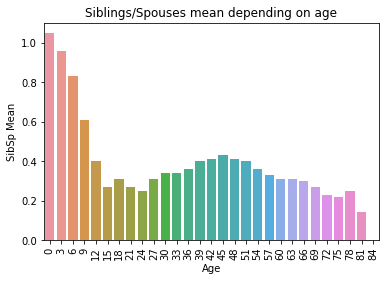

In [22]:
age_group = 3
sibsp_age_mean_data = titanic_data.groupby(
    [pd.cut(titanic_data['Age'], np.arange(90 / age_group) * age_group)])['SibSp'].mean().rename(
    'SibSp Mean').reset_index()
sibsp_age_mean_data['Age'] = sibsp_age_mean_data['Age'].apply(lambda col: pd.Categorical(col).codes * age_group)
sibsp_age_mean_data['SibSp Mean'] = sibsp_age_mean_data['SibSp Mean'].apply(lambda col: float("{:.2f}".format(col)))
print(sibsp_age_mean_data)

sex_age_plot = sns.barplot(x = sibsp_age_mean_data['Age'], y = sibsp_age_mean_data['SibSp Mean'])
plt.title('Siblings/Spouses mean depending on age')
plt.xticks(rotation = 90)
plt.show()


We can see that:<br>
    1. As children prefer to travel with their siblings and parents, and siblings can be more than 1, we see maximum value for babies and children<br>
    2. We see that middle age people (30-66 age) prefered to travel with their spouces rather often<br>
    3. For young people (15-30 ages) I assume that most of them has no spouces, so they travel alone<br>
    4. For elder people (66+ age) I assume that most of them are widows, so they travel alone<br>
   

Let's examine average count of sibling/spources depending on pclass:

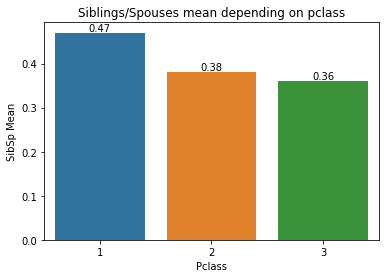

In [23]:
sibsp_age_mean_data = titanic_data.groupby('Pclass')['SibSp'].mean().rename('SibSp Mean').reset_index()
sibsp_age_mean_data['SibSp Mean'] = sibsp_age_mean_data['SibSp Mean'].apply(lambda col: float("{:.2f}".format(col)))

sibsp_age_plot = sns.barplot(x = sibsp_age_mean_data['Pclass'], y = sibsp_age_mean_data['SibSp Mean'])
sibsp_age_plot.bar_label(sibsp_age_plot.containers[0])
plt.title('Siblings/Spouses mean depending on pclass')
plt.show()

So, we can see light dependency there: people with a spouce or people (especially children) traveled by higher class that people who travel alone

## Parents/children aboard research

Let's verify survivors grouped by parents/children

    Parch  Survived  Count  Percentage
1       0         1  29799   40.520805
3       1         1   7694   59.202832
5       2         1   4323   38.474546
7       3         1    484   49.237030
9       4         1    127   28.475336
11      5         1    189   57.099698
13      6         1     42   20.588235
15      9         1    116   43.939394


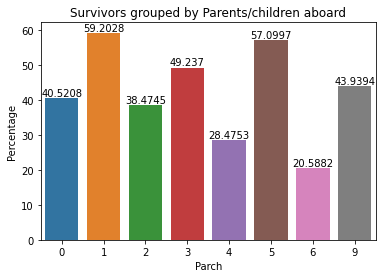

In [24]:
survived_parch_data = titanic_data.groupby(['Parch', 'Survived']).size().rename('Count').reset_index()

survived_parch_data['Percentage'] = percentage_column(survived_parch_data, 'Parch', 'Count')
survived_parch_data = survived_parch_data[survived_parch_data['Survived'] == 1]
print(survived_parch_data)

survived_parch_plot = sns.barplot(x = survived_parch_data['Parch'], y = survived_parch_data['Percentage'])
survived_parch_plot.bar_label(survived_parch_plot.containers[0])
plt.title('Survivors grouped by Parents/children aboard')
plt.show()

We can see very various data for different columns. Could it be explained by sex?

    Parch     Sex  Count  Percentage
0       0  female  29223   39.737558
2       1  female   8183   62.965528
4       2  female   5281   47.000712
6       3  female    571   58.087487
8       4  female    180   40.358744
10      5  female    237   71.601208
12      6  female     60   29.411765
14      9  female    151   57.196970


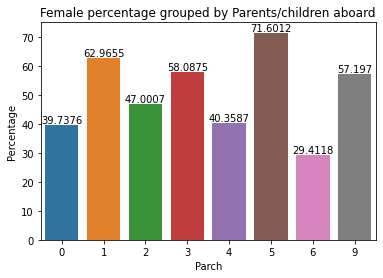

In [25]:
survived_parch_data = titanic_data.groupby(['Parch', 'Sex']).size().rename('Count').reset_index()

survived_parch_data['Percentage'] = percentage_column(survived_parch_data, 'Parch', 'Count')
survived_parch_data = survived_parch_data[survived_parch_data['Sex'] == 'female']
print(survived_parch_data)

survived_age_plot = sns.barplot(x = survived_parch_data['Parch'], y = survived_parch_data['Percentage'])
survived_age_plot.bar_label(survived_age_plot.containers[0])
plt.title('Female percentage grouped by Parents/children aboard')
plt.show()

Yes, we see that surviving difference for parents/children can be explained by sex

Let's examine dependency between parents/children and pclass

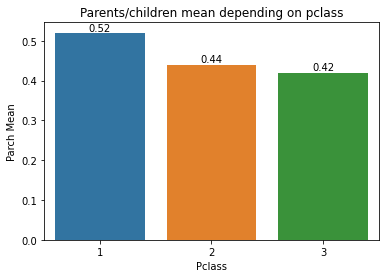

In [32]:
parch_age_mean_data = titanic_data.groupby('Pclass')['Parch'].mean().rename('Parch Mean').reset_index()
parch_age_mean_data['Parch Mean'] = parch_age_mean_data['Parch Mean'].apply(lambda col: float("{:.2f}".format(col)))

parch_age_plot = sns.barplot(x = parch_age_mean_data['Pclass'], y = parch_age_mean_data['Parch Mean'])
parch_age_plot.bar_label(parch_age_plot.containers[0])
plt.title('Parents/children mean depending on pclass')
plt.show()

We see similar situation as for sibling/spouces: people with more parents/children more often traveled by higher class

# Summary

Investigating this datasetwe found following correlations:

1. Women survived much more often than man

2. People with higher class survive much more often than with lower class

3. People with more parents/children and siblings/spources more often select higher class